<a href="https://colab.research.google.com/github/Sreejan09/ML---4/blob/main/kd_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install binarytree
!pip install pandas

In [17]:

from binarytree import tree, Node
from math import floor
import numpy as np

In [18]:
def distance(point1, point2):
    return np.linalg.norm(point1 - point2)

In [19]:
from math import floor
import numpy as np
import pandas as pd

class MyNode:
    def __init__(self, _id, data, axis, idx):
        self._id = _id
        self.data = data
        self.axis = axis
        self.idx = idx
        self.left = None
        self.right = None

class KD_Tree:
    def __init__(self, data):
        self.data = data
        self.tree = None

    def _build(self, points, depth):
        k = len(points.columns)
        _axis = depth % k
        _column = points.columns[_axis]

        if len(points) == 0:
            return None

        objects_list = points.sort_values(by=[_column], ascending=True)

        if len(objects_list) % 2 == 0:
            median_idx = int((len(objects_list) / 2))
        else:
            median_idx = floor((len(objects_list) / 2))

        node = MyNode(_id=round(objects_list.iloc[median_idx][_column], 3),
                      data=objects_list.iloc[median_idx],
                      axis=_column,
                      idx=median_idx)

        if len(objects_list) <= 40:
            return node  # Stop further branching if number of data points is 40 or fewer

        node.left = self._build(objects_list.iloc[0:median_idx], depth + 1)
        node.right = self._build(objects_list.iloc[median_idx + 1:], depth + 1)

        return node

    def build(self):
        self.tree = self._build(self.data, depth=0)

    def _nearest(self, query, node, best_node, best_distance):
        if not node:
            return best_node, best_distance

        d = distance(query.values[0], node.data.values)

        if d < best_distance:
            best_node = node
            best_distance = d
            print("best Node: {}".format(best_node.data.values))

        if query[node.axis].values[0] < node.data[node.axis]:
            good_side = node.left
            bad_side = node.right
        else:
            bad_side = node.left
            good_side = node.right

        best_node, best_distance = self._nearest(query, good_side, best_node, best_distance)

        if abs(node.data[node.axis] - query[node.axis].values[0]) < best_distance:
            best_node, best_distance = self._nearest(query, bad_side, best_node, best_distance)

        return best_node, best_distance

    def get_nn(self, query):
        return self._nearest(query, self.tree, None, np.inf)

In [20]:
import numpy as np
import pandas as pd

def generate_dataset(N, D):
    # Generate random values
    random_values = np.random.rand(N, D)
    # Round the values to two decimal places
    rounded_values = np.round(random_values, 2)
    # Create DataFrame from rounded values
    return pd.DataFrame(rounded_values, columns=[f"X{i}" for i in range(D)])

In [21]:
def measure_time_and_memory(N_values, D_values, KD_tree, k):
    training_times = []
    testing_times = []
    memory_usage = []

    for N in N_values:
        for D in D_values:
            # Generate random dataset
            dataset = generate_dataset(N, D)
            query_point = pd.DataFrame(np.random.rand(1, D), columns=[f"X{i}" for i in range(D)])

            # Build KD Tree
            KD = KD_tree(dataset)
            start_time = time.time()
            KD.build()
            end_time = time.time()
            training_time = end_time - start_time

            # Measure testing time
            start_time = time.time()
            KD.get_nn(query_point)
            end_time = time.time()
            testing_time = end_time - start_time

            # Measure memory usage
            process = psutil.Process()
            process_memory = process.memory_info().rss
            memory_usage.append(process_memory)

            # Append to lists
            training_times.append(training_time)
            testing_times.append(testing_time)

    return training_times, testing_times, memory_usage

In [22]:
import time
import psutil  # For memory usage
import matplotlib.pyplot as plt

best Node: [0.51 0.62]
best Node: [0.17 0.46]
best Node: [0.51 0.86 0.75]
best Node: [0.9  0.63 0.44]
best Node: [0.74 0.64 0.32]
best Node: [0.51 0.8  0.34]
best Node: [0.52 0.59 0.17 0.96 0.18]
best Node: [0.48 0.54 0.17 0.32 0.44]
best Node: [0.45 0.8  0.55 0.65 0.75]
best Node: [0.52 0.79 0.23 0.49 0.36 0.83 0.02]
best Node: [0.72 0.52 0.05 0.93 0.71 0.75 0.79]
best Node: [0.52 0.64 0.23 0.58 0.65 0.69 0.78]
best Node: [0.48 0.3  0.32 0.26 0.75 0.37 0.73 0.46 0.55]
best Node: [0.52 0.54 0.39 0.31 0.25 0.34 0.46 0.19 0.22]
best Node: [0.49 0.58 0.62 0.41 0.3  0.68 0.85 0.69 0.93]
best Node: [0.52 0.89 0.59 0.92 0.55 0.51 0.22 0.54 0.14]
best Node: [0.57 0.74 0.78 0.3  0.51 0.62 0.82 0.76 0.99]
best Node: [0.55 0.74 0.34 0.45 0.1  0.07 0.46 0.3  0.61]
best Node: [0.97 0.06 0.59 0.86 0.48 0.   0.24 0.32 0.97]
best Node: [0.25 0.68 0.87 0.37 0.84 0.43 0.4  0.03 0.7 ]
best Node: [0.48 0.29 0.6  0.72 0.45 0.87 0.52 0.14 0.62 0.46]
best Node: [0.41 0.14 0.51 0.67 0.79 0.71 0.15 0.46 0.04 

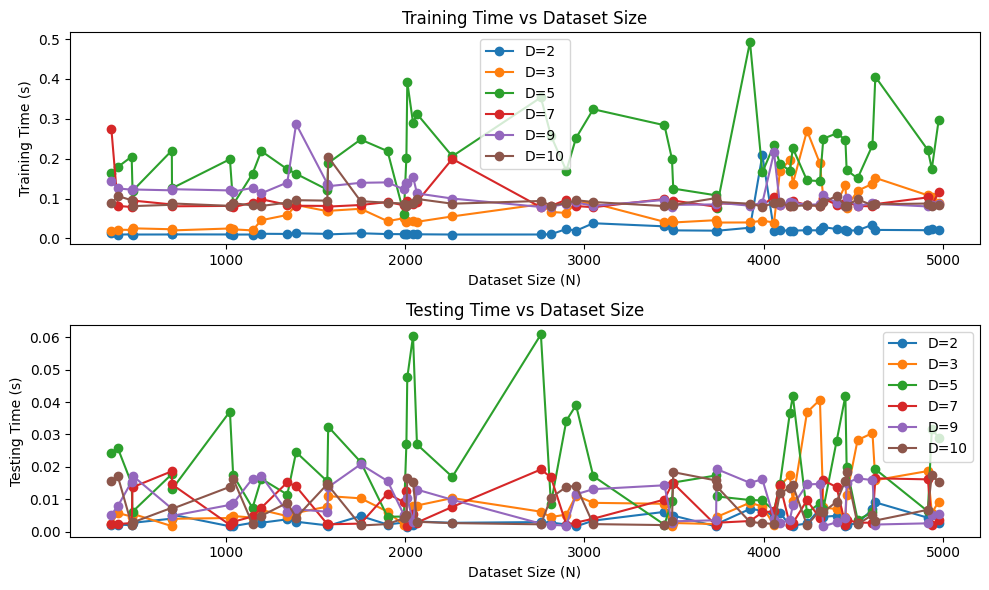

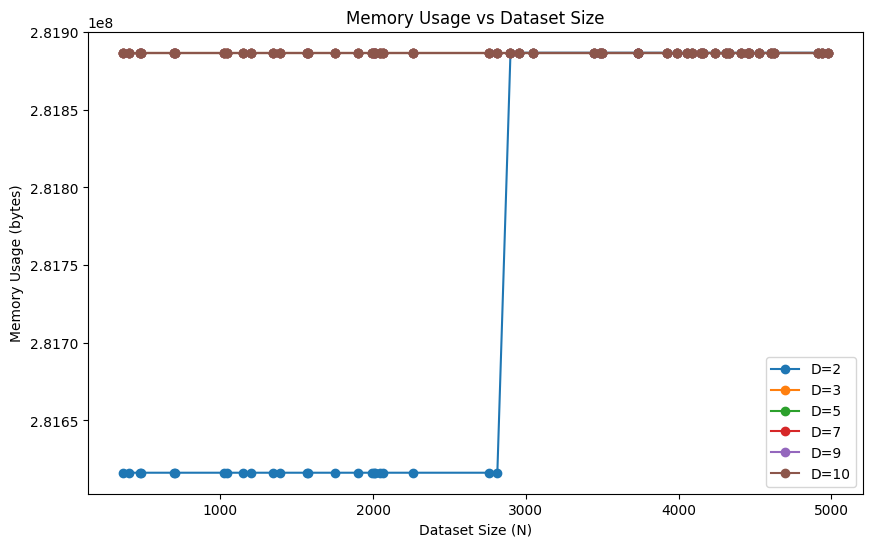

In [23]:
# Define parameters
#N_values = np.random.randint(low=100, high=1000, size=50)  # Varying dataset sizes
N_values = np.sort(np.random.randint(low=100, high=5000, size=50))
D_values = [2, 3, 5, 7, 9, 10]  # Varying number of dimensions
k = 5  # Number of nearest neighbors

# Measure time and memory
training_times, testing_times, memory_usage = measure_time_and_memory(N_values, D_values, KD_Tree, k)

# Plot results
plt.figure(figsize=(10, 6))

# Plot training time
plt.subplot(2, 1, 1)
for i, D in enumerate(D_values):
    plt.plot(N_values, training_times[i * len(N_values):(i + 1) * len(N_values)], marker='o', label=f"D={D}")
plt.title('Training Time vs Dataset Size')
plt.xlabel('Dataset Size (N)')
plt.ylabel('Training Time (s)')
plt.legend()
# Plot testing time
plt.subplot(2, 1, 2)
for i, D in enumerate(D_values):
    plt.plot(N_values, testing_times[i * len(N_values):(i + 1) * len(N_values)], marker='o', label=f"D={D}")
plt.title('Testing Time vs Dataset Size')
plt.xlabel('Dataset Size (N)')
plt.ylabel('Testing Time (s)')
plt.legend()

plt.tight_layout()
plt.show()

# Plot memory usage
plt.figure(figsize=(10, 6))
for i, D in enumerate(D_values):
    plt.plot(N_values, memory_usage[i * len(N_values):(i + 1) * len(N_values)], marker='o', label=f"D={D}")
plt.title('Memory Usage vs Dataset Size')
plt.xlabel('Dataset Size (N)')
plt.ylabel('Memory Usage (bytes)')
plt.legend()
plt.show()

In [24]:
!pip install datasketch

Approximate Neighbors' Indices: []


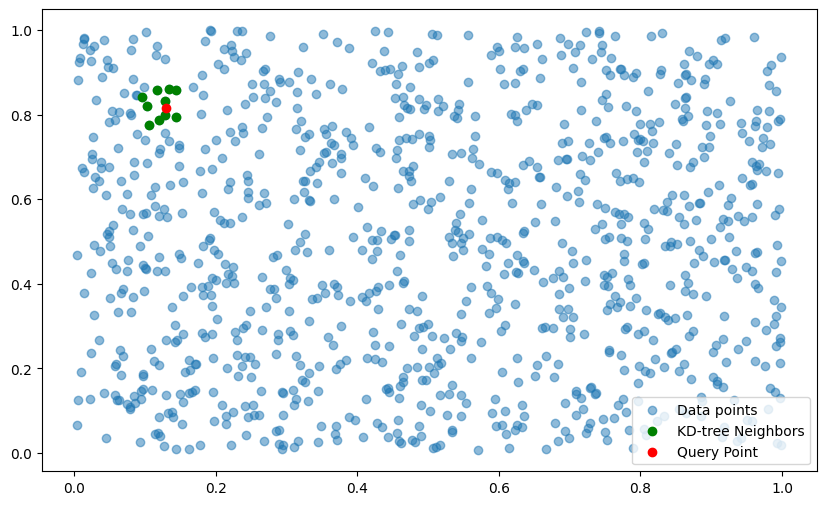

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors, KDTree
from datasketch import MinHash, MinHashLSH

# Function to create a MinHash object from numerical data
def create_minhash(data_point, num_perm=128):
    m = MinHash(num_perm=num_perm)
    for feature in data_point:
        m.update(str(feature).encode('utf8'))
    return m

# Generate random 2D data
N = 1000  # number of points
D = 2  # dimensions
data = np.random.rand(N, D)

# KD-tree
nn_kdtree = KDTree(data, leaf_size=30)

# LSH setup
lsh = MinHashLSH(threshold=0.5, num_perm=128)
minhashes = {}
for i, point in enumerate(data):
    minhash = create_minhash(point)
    minhashes[i] = minhash
    lsh.insert(f"data_{i}", minhash)

# Query point and its MinHash
query_point = np.random.rand(1, D)[0]
query_minhash = create_minhash(query_point)
result = lsh.query(query_minhash)

# Results and visualization
print("Approximate Neighbors' Indices:", result)

# KD-tree query
_, kd_indices = nn_kdtree.query([query_point], k=10)

# Visualize data points
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, label='Data points')
plt.scatter(data[kd_indices[0], 0], data[kd_indices[0], 1], color='g', label='KD-tree Neighbors')
plt.scatter(query_point[0], query_point[1], color='red', label='Query Point')

# Highlight LSH results
for idx in result:
    idx = int(idx.split("_")[1])
    plt.scatter(data[idx, 0], data[idx, 1], color='yellow', edgecolor='black', label='LSH Neighbors' if 'LSH Neighbors' not in plt.gca().get_legend_handles_labels()[1] else "")

plt.legend()
plt.show()

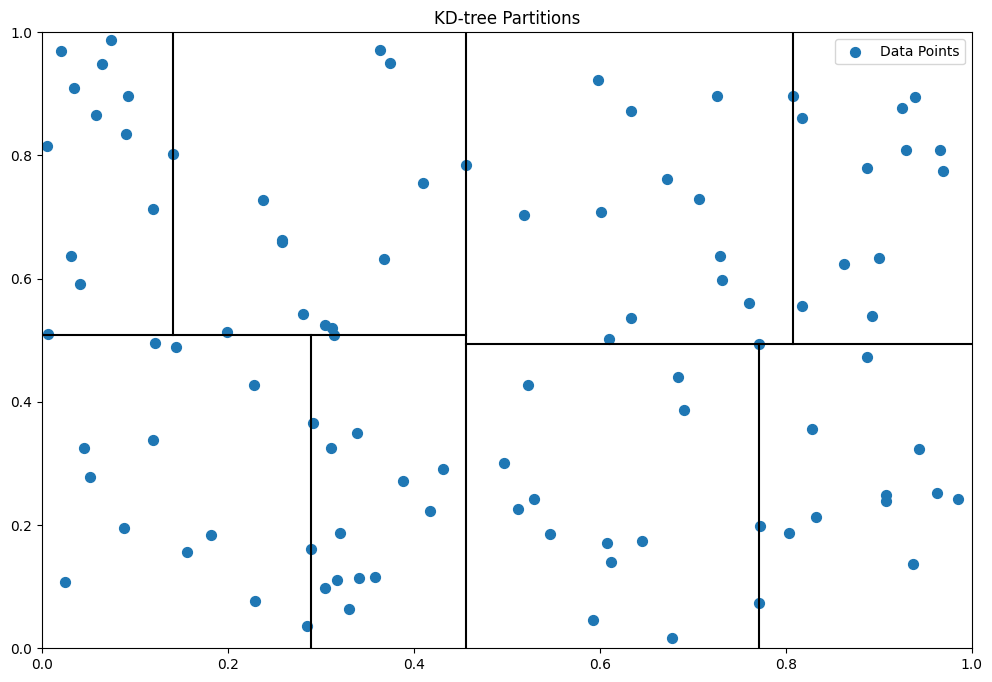

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# We'll need to modify your MyNode class to store the splitting hyperplane and to reference the parent
class MyNode:
    def __init__(self, _id, data, axis, idx, parent=None):
        self._id = _id
        self.data = data
        self.axis = axis
        self.idx = idx
        self.parent = parent
        self.left = None
        self.right = None

# Calculate Euclidean distance
def distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Custom KD-tree implementation
from math import floor
import numpy as np
import pandas as pd



class KD_Tree:
    def __init__(self, data):
        self.data = data
        self.tree = None

    def _build(self, points, depth):
        k = len(points.columns)
        _axis = depth % k
        _column = points.columns[_axis]

        if len(points) == 0:
            return None

        objects_list = points.sort_values(by=[_column], ascending=True)

        if len(objects_list) % 2 == 0:
            median_idx = int((len(objects_list) / 2))
        else:
            median_idx = floor((len(objects_list) / 2))

        node = MyNode(_id=round(objects_list.iloc[median_idx][_column], 3),
                      data=objects_list.iloc[median_idx],
                      axis=_column,
                      idx=median_idx)

        if len(objects_list) <= 40:
            return node  # Stop further branching if number of data points is 40 or fewer

        node.left = self._build(objects_list.iloc[0:median_idx], depth + 1)
        node.right = self._build(objects_list.iloc[median_idx + 1:], depth + 1)

        return node

    def build(self):
        self.tree = self._build(self.data, depth=0)

    def _nearest(self, query, node, best_node, best_distance):
        if not node:
            return best_node, best_distance

        d = distance(query.values[0], node.data.values)

        if d < best_distance:
            best_node = node
            best_distance = d
            print("best Node: {}".format(best_node.data.values))

        if query[node.axis].values[0] < node.data[node.axis]:
            good_side = node.left
            bad_side = node.right
        else:
            bad_side = node.left
            good_side = node.right

        best_node, best_distance = self._nearest(query, good_side, best_node, best_distance)

        if abs(node.data[node.axis] - query[node.axis].values[0]) < best_distance:
            best_node, best_distance = self._nearest(query, bad_side, best_node, best_distance)

        return best_node, best_distance

    def get_nn(self, query):
        return self._nearest(query, self.tree, None, np.inf)


# Function to visualize the KD-tree partitions
def visualize_tree(node, min_x, max_x, min_y, max_y):
    if node is None:
        return

    # Determine the splitting axis
    axis = node.axis
    value = node.data[axis]

    # Draw the splitting line
    if axis == 'x':
        plt.axvline(value, ymin=min_y, ymax=max_y, color='black')
        visualize_tree(node.left, min_x, value, min_y, max_y)
        visualize_tree(node.right, value, max_x, min_y, max_y)
    elif axis == 'y':
        plt.axhline(value, xmin=min_x, xmax=max_x, color='black')
        visualize_tree(node.left, min_x, max_x, min_y, value)
        visualize_tree(node.right, min_x, max_x, value, max_y)

# Generate a 2D dataset
np.random.seed(42)
N = 100  # Number of points
data = pd.DataFrame(np.random.rand(N, 2), columns=['x', 'y'])

# Instantiate and build the KD-tree
kd_tree = KD_Tree(data)
kd_tree.build()

# Define the bounds of the plot
min_x, max_x = 0, 1
min_y, max_y = 0, 1

# Plot the dataset and the partitions
plt.figure(figsize=(12, 8))
plt.scatter(data['x'], data['y'], s=50, label='Data Points')

# Plot the partitions
visualize_tree(kd_tree.tree, min_x, max_x, min_y, max_y)

plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.legend()
plt.title('KD-tree Partitions')
plt.show()